<a href="https://colab.research.google.com/github/lilasu086/Individual_CodingProject/blob/main/SupplyChain_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part I: Stationary Series

### Question 1





In [ ]:
import pandas as pd
import numpy as np

jeans = pd.read_excel('/content/jeans_data_full_dataset.xlsx')
jeans.head(10)

,week,price,sales,special_event,se_indicator
0,1,94,259,New Year's Day,1
1,2,135,69,NaN,0
2,3,135,59,NaN,0
3,4,81,149,NaN,0
4,5,135,72,NaN,0
5,6,135,66,NaN,0
6,7,94,259,Presidents' Day,1
7,8,135,57,NaN,0
8,9,135,70,NaN,0
9,10,101,149,NaN,0


<Axes: xlabel='week', ylabel='sales'>

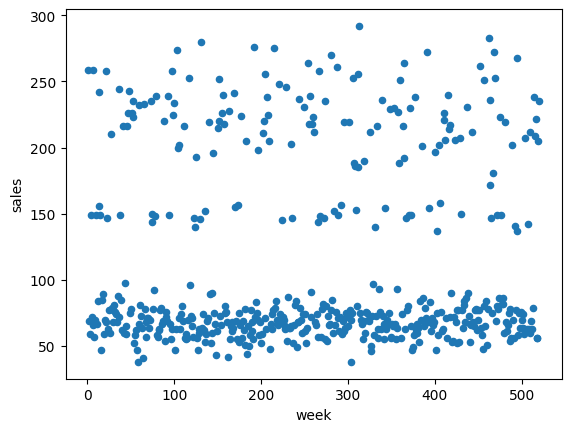

In [ ]:
jeans.plot.scatter(x="week",y="sales")

In [ ]:
import statsmodels.api as sm

ols_1 = sm.OLS.from_formula("sales ~ price + se_indicator", data=jeans).fit()
jeans["residual"] = ols_1.resid
jeans

,week,price,sales,special_event,se_indicator,residual
0,1,94,259,New Year's Day,1,33.096706
1,2,135,69,NaN,0,-0.508483
2,3,135,59,NaN,0,-10.508483
3,4,81,149,NaN,0,6.465910
4,5,135,72,NaN,0,2.491517
...,...,...,...,...,...,...
515,516,108,222,Black Friday,1,15.029271
516,517,135,56,NaN,0,-13.508483
517,518,135,56,NaN,0,-13.508483
518,519,74,205,Christmas Eve,1,-47.949814


#### 1.a

a. Moving Average (MA) estimations

• Try N = 1 to 5 and forecast estimates for weeks 6 to 520

• Start forecast on week 6 as need 5 weeks of historical data for N=5

• Report resultant MSE values

• MA* = [MA(N) with optimal value of N]

In [ ]:
jeans.residual[5:]

5      -3.508483
6      33.096706
7     -12.508483
8       0.491517
9      33.512431
         ...    
515    15.029271
516   -13.508483
517   -13.508483
518   -47.949814
519    28.029271
Name: residual, Length: 515, dtype: float64

In [ ]:
jeans["residual"].rolling(5).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4       6.207433
         ...    
515    -2.497696
516    -3.897696
517    -8.497696
518   -18.884208
519    -6.381648
Name: residual, Length: 520, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
for index in range(1,6):
    print([index,mean_squared_error(jeans.residual[5:],
                                    jeans["residual"].rolling(index).mean()[4:519])])

[1, 704.900311478015]
[2, 532.7162183762657]
[3, 443.5054659264676]
[4, 407.83296125158586]
[5, 401.83142722141923]


[Answer 1.a]

From the MSE result, I can observe that MA(5) has the lowest one.

#### 1.b

b. Single Exponential Smoothing (ES) estimations

• Try alpha = 0.1 to 1 using 0.1 increments and forecast estimates for weeks 6 to 520

• Assume a burn-in period of 5 weeks

• Report resultant MSE values

• Single ES* = [Single ES(alpha) with optimal value of alpha]

In [ ]:
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing

for alpha in np.arange(0.1, 1.1, 0.1):
    print([alpha,
           mean_squared_error(jeans.residual[5:],ExponentialSmoothing(jeans.residual, initialization_method='estimated').fit(smoothing_level = alpha).predict(5, 519))])

[0.1, 359.71183790431155]
[0.2, 379.98877160113625]
[0.30000000000000004, 403.2433104741468]
[0.4, 430.3807232186817]
[0.5, 461.7905342565683]
[0.6, 497.86612289285716]
[0.7000000000000001, 539.1741285058364]
[0.8, 586.5368374010899]
[0.9, 641.1666352109238]
[1.0, 704.900311478015]


[Answer 1.b]

From the MSE result, I can observe that SES(0.1) has the lowest one.

#### 1.c

c. Assess MA* versus Single ES*

• Generate plot with residuals, MA* forecast, and Single ES* forecast

• Compare MA* and Single ES* outcomes on training sample and provide your recommendation of method and justification. Simply showing output of running code
does not suffice as a justification, provide an interpretation in your own words!

In [ ]:
jeans.loc[5:, 'ma'] = jeans["residual"].rolling(5).mean().iloc[4:519].values #[4:]

In [ ]:
jeans.loc[5:, 'ses'] = ExponentialSmoothing(jeans.residual, initialization_method='estimated').fit(smoothing_level = 0.1).predict(5,519)

In [ ]:
jeans.head(10)

,week,price,sales,special_event,se_indicator,residual,ma,ses
0,1,94,259,New Year's Day,1,33.096706,NaN,NaN
1,2,135,69,NaN,0,-0.508483,NaN,NaN
2,3,135,59,NaN,0,-10.508483,NaN,NaN
3,4,81,149,NaN,0,6.465910,NaN,NaN
4,5,135,72,NaN,0,2.491517,NaN,NaN
5,6,135,66,NaN,0,-3.508483,6.207433,6.418486
6,7,94,259,Presidents' Day,1,33.096706,-1.113605,5.425789
7,8,135,57,NaN,0,-12.508483,5.607433,8.192881
8,9,135,70,NaN,0,0.491517,5.207433,6.122744
9,10,101,149,NaN,0,33.512431,4.012555,5.559622


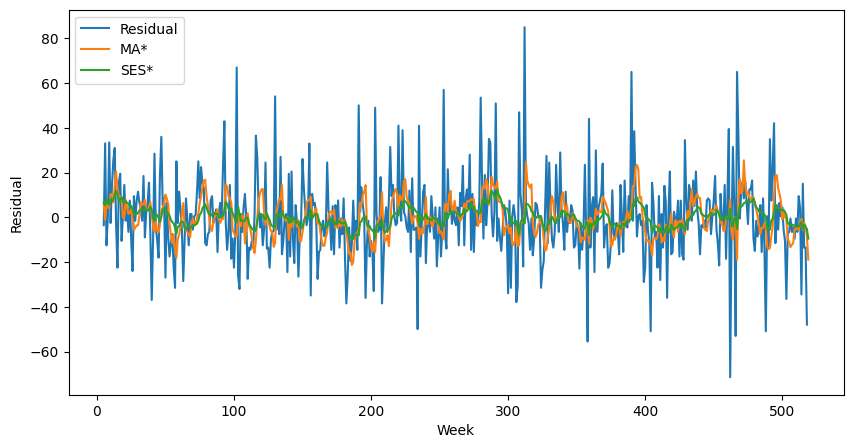

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(jeans.residual[5:], label='Residual')
plt.plot(jeans.ma[5:], label='MA*') #[4:]
plt.plot(jeans.ses[5:], label='SES*')
plt.legend(loc='best')
plt.xlabel('Week')
plt.ylabel('Residual')
plt.show()

[Answer 1.c]

From the chart above, it's apparent that SES provides smoother results, while MA exhibits higher responsiveness. This discrepancy arises because SES incorporates information from the entire historical dataset, assigning much greater weight to recent observations compared to older ones. Consequently, SES tends to exhibit less pronounced fluctuations.

Regarding prediction accuracy, I find that MA outperforms SES. This is because the original residual output undergoes significant changes, and MA adjusts its values in a manner similar to the original fluctuations. As a result, their fluctuations closely resemble each other. Therefore, based on this observation, I believe MA demonstrates greater potential in predicting residual values.

## Part II: Non-Stationary Series with Trend

### Question 2

In [ ]:
import pandas as pd
import numpy as np

bitcoin = pd.read_excel('/content/bitcoin_data.xlsx')
bitcoin.head(10)

,date,close_price
0,2023-03-22,27307.437500
1,2023-03-23,28333.972656
2,2023-03-24,27493.285156
3,2023-03-25,27494.707031
4,2023-03-26,27994.330078
5,2023-03-27,27139.888672
6,2023-03-28,27268.130859
7,2023-03-29,28348.441406
8,2023-03-30,28033.562500
9,2023-03-31,28478.484375


<Axes: xlabel='date', ylabel='close_price'>

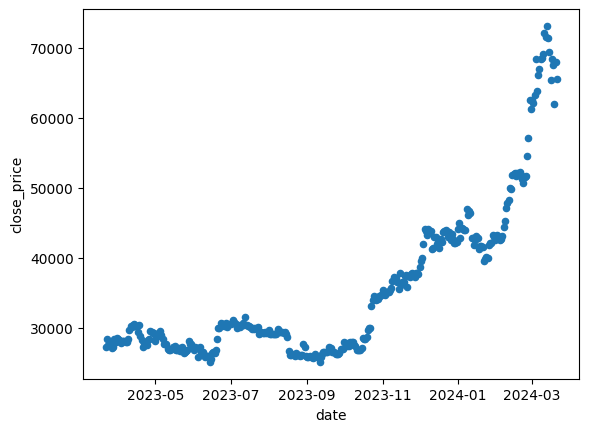

In [ ]:
bitcoin.plot.scatter(x="date",y="close_price")

#### 2.a

a. Test for non-stationarity

• Using the Augmented Dickey-Fuller test, provide your conclusion on the nature of the data based on patterns of the Bitcoin prices over time

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_result = adfuller(bitcoin.close_price)
print('ADF Statistic: %f' % ad_result[0])
print('p-value: %f' % ad_result[1])

ADF Statistic: 1.152174
p-value: 0.995638


[Answer 2.a]

From the ADF Statistic and p-value, it's evident that the closing price of Bitcoin is non-stationary. The p-value exceeds 0.05, indicating that I cannot reject the null hypothesis, suggesting that the time series possesses a unit root and is non-stationary. This conclusion is reasonable, considering that financial products like Bitcoin typically exhibit trends over time.

#### 2.b

b. Double Exponential Smoothing (DES) estimations

• Provided that your test for non-stationarity was supported, forecast estimates by fitting a DES model

• Try alpha and beta from 0 to 1 with 0.05 increments

• Use the first 266 days as training sample

• Assume a burn-in period of 10 days

• Calculate training sample MSE for days 11 to 266

• Forecast for the last 100 days

• DES* = [optimal DES(alpha,beta) with optimal combination of alpha and beta]

• Report resultant MSE values, both for process of forecasting training and test data. Provide a conclusion on whether the DES* performs better on the train or test data.

• Generate plot with Bitcoin prices and DES* forecasts. Explain what is represented in the plot. Simply showing output of running code does not suffice as an explanation,
clearly state what is shown in the plot in your own words!

In [ ]:
def DESMSE(alpha,beta):
    return mean_squared_error(bitcoin.close_price[10:266],
                            ExponentialSmoothing(bitcoin.close_price[:266],trend="add", initialization_method='estimated').fit(smoothing_level = alpha,smoothing_trend = beta).predict(10,265))

In [ ]:
from itertools import product
def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())],
                       columns=dictionary.keys())


dictionary = {'alpha': np.arange(0.0, 1.01, 0.05),
              'beta': np.arange(0.0, 1.01, 0.05)}

In [ ]:
des_results = expand_grid(dictionary)

des_results["mse"] = np.repeat(0,len(des_results))

for alpha in np.arange(0.0, 1.01, 0.05):
    for beta in np.arange(0.0, 1.01, 0.05):
       des_results.loc[(des_results["alpha"] == alpha) & (des_results["beta"] == beta),"mse"] = DESMSE(alpha,beta)

des_results.sort_values("mse").head(10)

,alpha,beta,mse
399,0.95,0.00,401731.203935
420,1.00,0.00,402518.535038
378,0.90,0.00,403372.561339
357,0.85,0.00,407553.055980
400,0.95,0.05,408445.511031
379,0.90,0.05,408781.472825
421,1.00,0.05,410673.072142
358,0.85,0.05,411753.556616
336,0.80,0.00,414467.130448
380,0.90,0.10,417358.672399


In [ ]:
bitcoin.loc[bitcoin.index[266:], 'des'] = ExponentialSmoothing(bitcoin.close_price[:266],trend="add", initialization_method='estimated').fit(smoothing_level = 0.95,smoothing_trend = 0.00).forecast(100)
bitcoin

,date,close_price,des
0,2023-03-22,27307.437500,NaN
1,2023-03-23,28333.972656,NaN
2,2023-03-24,27493.285156,NaN
3,2023-03-25,27494.707031,NaN
4,2023-03-26,27994.330078,NaN
...,...,...,...
361,2024-03-17,68390.625000,46555.087448
362,2024-03-18,67548.593750,46608.275464
363,2024-03-19,61912.773438,46661.463480
364,2024-03-20,67913.671875,46714.651496


In [ ]:
mean_squared_error(bitcoin.close_price[266:],bitcoin.des[266:])

110489740.33291502

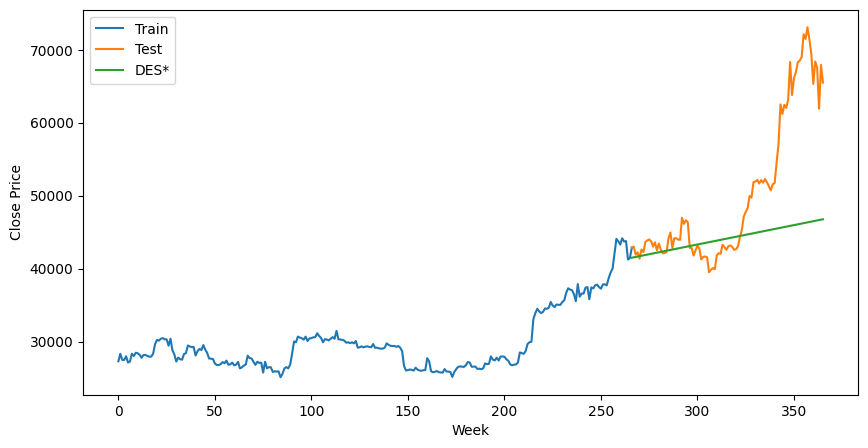

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(bitcoin.close_price[:267], label='Train')
plt.plot(bitcoin.close_price[266:], label='Test')
plt.plot(bitcoin.des[266:], label='DES*')
plt.legend(loc='best')
plt.xlabel('Week')
plt.ylabel('Close Price')
plt.show()

[Answer 2.b]

The MSE results indicate that DES performs better on the training data (MSE: 401731.203935) compared to the test data (MSE: 110489740.33291502).

From the plot, I can see that DES initially tracks the true values closely, with a relatively small error. However, as time progresses, the gap between predicted and actual values widens, leading to a significant increase in MSE for the test data. This discrepancy arises because DES initially captures the trend and seasonality present in the data, but over time, it struggles to adapt to evolving patterns, resulting in larger prediction errors.